# 03AgeCOVID19

# Libraries

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display


sns.set_palette("pastel")

# Load Data

In [13]:
age = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\age.csv", parse_dates=["date"])

# Size

In [14]:
age.shape

(1089, 5)

# Missing Data

In [15]:
age.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

# Rename Columns

In [16]:
age.rename(
    columns={
        "date": "Date",
        "age": "Age",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

# Delete Unneeded Column 

In [17]:
pd.set_option("max_rows", None)
age.drop('time', inplace = True, axis = 1)

# The First Five Rows

In [18]:
age.head()

,Date,Age,Confirmed,Deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


# Confirmed by Age

In [19]:
confirmed_by_age = (
    age[["Age", "Confirmed"]]
    .groupby(["Age"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

confirmed_by_age = confirmed_by_age.reset_index()

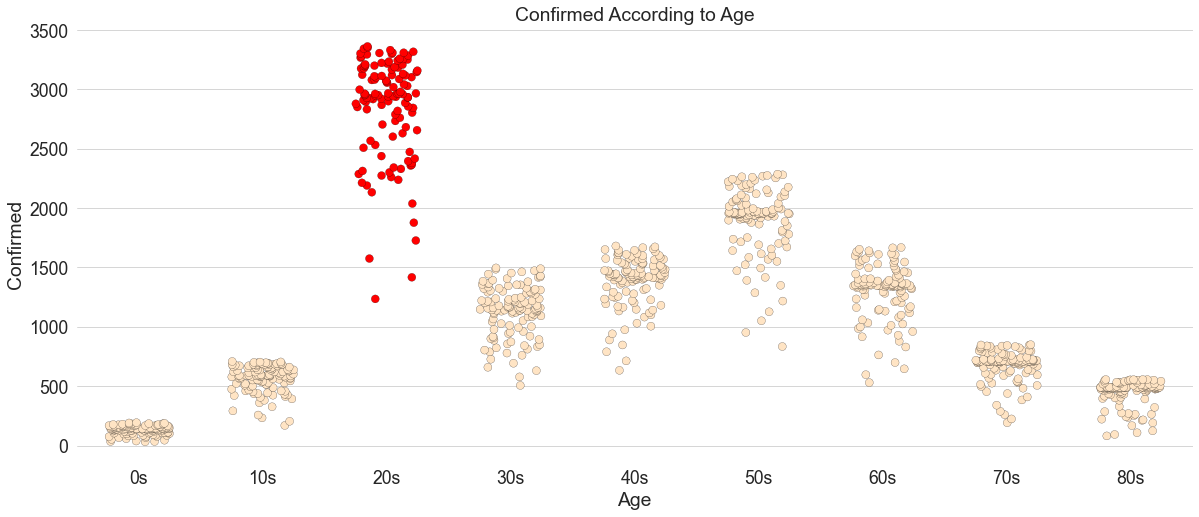

In [20]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

palette = {
    "0s": ord_color,
    "10s": ord_color,
    "20s": spec_lev1,
    "30s": ord_color,
    "40s": ord_color,
    "50s": ord_color,
    "60s": ord_color,
    "70s": ord_color,
    "80s": ord_color, 
}

sns.stripplot(
    data=age,
    x="Age",
    y="Confirmed",
    jitter=0.25,
    size=8,
    linewidth=0.2,
    edgecolor="black",
    palette= palette,
)

sns.despine(left=True, bottom=True)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
plt.xlabel("Age")
plt.ylabel("Confirmed")
plt.title("Confirmed According to Age");

# Deceased by Age

In [21]:
deceased_by_age = (
    age[["Age", "Deceased"]]
    .groupby(["Age"])
    .max()
    .sort_values("Deceased", ascending=False)
)

deceased_by_age = deceased_by_age.reset_index()

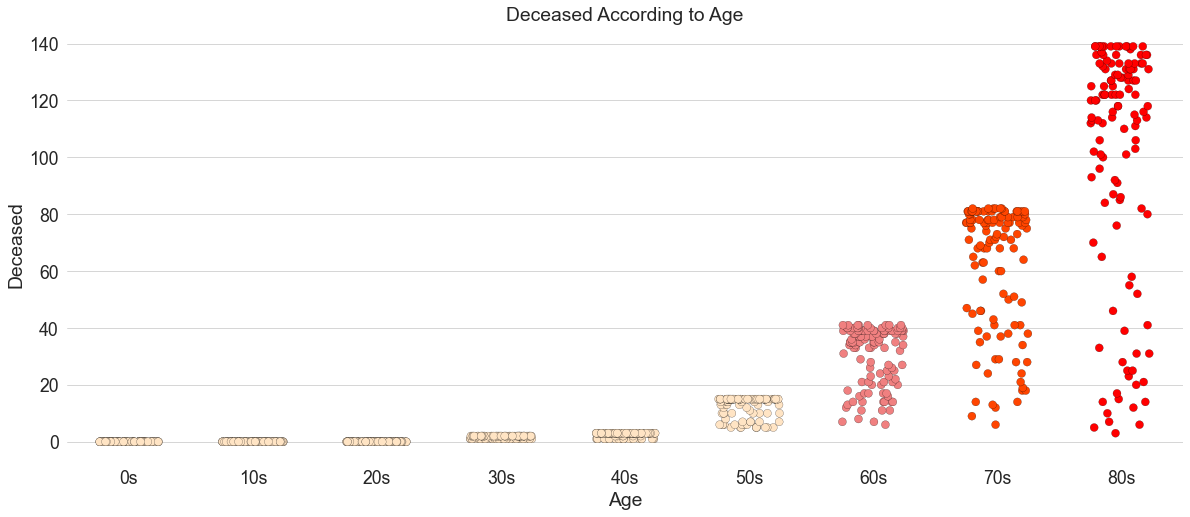

In [22]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"
spec_lev2 = 'orangered'
spec_lev3 = "lightcoral"

palette = {
    "0s": ord_color,
    "10s": ord_color,
    "20s": ord_color,
    "30s": ord_color,
    "40s": ord_color,
    "50s": ord_color,
    "60s": spec_lev3,
    "70s": spec_lev2,
    "80s": spec_lev1, 
}

sns.stripplot(
    data=age,
    x="Age",
    y="Deceased",
    jitter=0.25,
    size=8,
    linewidth=0.2,
    edgecolor='Black',
    palette= palette,

);

sns.despine(left=True, bottom=True)
plt.xlabel("Age")
plt.ylabel("Deceased")
plt.title("Deceased According to Age");